In [65]:
import numpy as np
import pandas as pd
import os
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from collections import OrderedDict

In [66]:
from platform import python_version
print(python_version())

3.6.6


### Create edgelist using events data

In [228]:
event_file = [item for item in os.listdir('../../data/protag_events_nogen/') if 'txt' in item]

In [229]:
events_all = []
cnt = 0
for name in event_file:
    movie_events = []
    with open(os.path.join('../../data/protag_events_nogen/', name), 'r') as f:
        lines = [line.strip() for line in f.readlines()]
        for line in lines:
            line = line.split(' ')
            movie_events.append(line[1].split('-')[0])
        events_all.append(movie_events)


In [230]:
len(events_all)

13053

In [231]:
def build_edgelist(events_all=events_all, use_top_nodes=False, top_events=None ):
    edgelist = []
    if use_top_nodes == False:
        for movie_event in events_all:
            for i in range(len(movie_event)-1):
                 edgelist.append((movie_event[i], movie_event[i+1]))
    else:
        events_all_flt = []
        for item in events_all:
            events_all_flt.extend(item)
        c = Counter(events_all_flt)
        top_events = set([item[0] for item in c.most_common(top_events)])
        for movie_event in events_all:
            for i in range(len(movie_event)-1):
        #         only use the most frequent x events
                if movie_event[i] in top_events and movie_event[i+1] in top_events:
                    edgelist.append((movie_event[i], movie_event[i+1]))
    return edgelist

In [232]:
edgelist = build_edgelist(events_all)

In [233]:
def build_wtd_edgelist(edgelist, k=1):
    edgelist_wtd = []
    c = Counter(edgelist)
    for item in edgelist:
        if c[item] > k:
            edge = (item[0], item[1], c[item])
            edgelist_wtd.append(edge)
    return edgelist_wtd

In [234]:
edgelist_wtd = build_wtd_edgelist(edgelist)

In [286]:
triples = []
for movie_event in events_all:
    c = Counter(movie_event)
    if max(c.values()) < 10:
        for i in range(len(movie_event)-2):
             triples.append((movie_event[i], movie_event[i+1], movie_event[i+2]))

In [270]:
for item in events_all:
    print(item)
    print()

['build', 'steal', 'steal', 'exit', 'exit', 'catch', 'do', 'make']

['arrive', 'retrieve', 'confront', 'manage', 'fend', 'meet', 'fight', 'come', 'arrive', 'manage', 'be', 'change', 'control', 'make']

['ask', 'burn', 'believe', 'think', 'room', 'have', 'ask', 'come', 'go', 'drop', 'try', 'explain', 'pounce', 'realize', 'smoke', 'experience', 'head', 'head', 'tell', 'theorize', 'find', 'find', 'take', 'pass', 'take', 'take', 'take', 'take', 'take', 'take', 'end', 'pleasure', 'beat', 'reply', 'deal', 'tie', 'tie', 'see', 'get', 'continue', 'get', 'claim', 'ask', 'offer']

['declare', 'agree', 'work', 'meet', 'learn', 'inherit', 'decide', 'end', 'end', 'decide', 'play', 'go', 'decide', 'accept', 'insist', 'find', 'hurt', 'have', 'make', 'return', 'give', 'tell', 'put']

['decide', 'drive', 'fall', 'see', 'drive', 'look', 'ask', 'ask', 'use', 'invite', 'stop', 'enter', 'start', 'move', 'drive', 'begin', 'see', 'believe', 'tell', 'think', 'anger', 'stop', 'refuse', 'stop', 'see', 'shoot', 

['ban', 'permit', 'leave', 'ban', 'invite', 'impose', 'begin', 'come', 'arrest', 'beat', 'work', 'meet', 'target', 'decide', 'use']

['want', 'go', 'stay', 'begin', 'squirrel', 'go', 'find', 'refuse', 'believe', 'disappoint', 'find', 'operate', 'reunite', 'accept', 'drop', 'return', 'assure', 'run', 'arrive', 'kill', 'kill']

['have', 'struggle', 'learn', 'attend', 'continue', 'teach', 'pick', 'see', 'struggle', 'know']

['excite', 'take', 'show', 'leave', 'lie', 'believe', 'go', 'want', 'find', 'go', 'keep', 'manage', 'tell', 'manage', 'accompany', 'manage', 'start']

['kill', 'want', 'marry', 'steal', 'return', 'find', 'capture', 'refuse', 'hang', 'turn']

['insist', 'die', 'burn', 'pickle', 'keep', 'tell', 'explain', 'collect', 'take', 'repeat', 'manage', 'propose', 'pour']

['spend', 'meet', 'steal', 'go', 'suggest', 'discover', 'find', 'get', 'live', 'begin', 'realize', 'tell', 'wait', 'reconcile']

['introduce', 'pretend', 'love', 'befriend', 'meet', 'start', 'confront', 'have', 

['spot', 'spend', 'discover', 'decide', 'go', 'open', 'spot', 'wait', 'celebrate']

['relieve', 'send', 'head', 'seize', 'cast', 'end', 'make', 'make', 'have', 'remain', 'start', 'pretend', 'give', 'start', 'prepare', 'resume']

['work', 'give', 'refuse', 'keep', 'discover', 'hit', 'drive', 'proclaim', 'drive', 'make', 'hit', 'prosper', 'want', 'visit', 'develop', 'date', 'punch', 'have', 'lead', 'collapse', 'fall', 'disclose']

['guard', 'come', 'campaign', 'infiltrate', 'discover', 'make', 'resign', 'try', 'telegram', 'find', 'force', 'discover', 'return', 'find', 'summon', 'manage', 'grapple', 'appear', 'doze', 'become', 'become', 'try', 'have', 'take', 'manage', 'escape', 'get', 'order', 'run', 'get', 'claim', 'take', 'free', 'read']

['say', 'give', 'reveal', 'kill', 'kill', 'kill', 'accept', 'die', 'pray', 'keep', 'imitate', 'imitate', 'put', 'vow', 'place', 'give', 'fall', 'rush', 'fight', 'place', 'place', 'place']

['confront', 'catch', 'flee', 'enjoy', 'fall', 'propose', 'pic

['turn', 'decipher', 'open', 'bludgeon', 'take', 'receive', 'reveal', 'get', 'go', 'trace', 'come', 'threaten', 'rescue', 'find', 'wander', 'tell', 'bear', 'view', 'stick', 'do', 'try']

['leave', 'awake', 'rush', 'try', 'call', 'reach', 'get', 'ask', 'realize', 'dial', 'hear', 'shoot', 'tell', 'convince', 'arrange', 'meet', 'jump', 'help', 'hinder', 'find', 'find', 'tell', 'meet', 'wonder', 'find', 'try', 'comfort']

['imprison', 'show', 'learn', 'try', 'tell', 'attack', 'sentence', 'run', 'adopt', 'build', 'make', 'become', 'publish', 'meet', 'agree', 'go', 'marry', 'transfer', 'keep', 'grow', 'manage', 'help', 'assure', 'take', 'transfer', 'meet', 'get']

['learn', 'seek', 'attack', 'manage', 'separate', 'locate', 'set', 'die', 'set', 'stop', 'climb', 'turn', 'steal', 'pull', 'ask', 'fly', 'reunite']

['perform', 'encourage', 'get', 'see', 'discover', 'wait', 'go', 'go', 'use', 'go', 'make', 'get', 'sing', 'drop', 'pick', 'refuse', 'try', 'say', 'snitch', 'congratulate', 'try', 'go'

['decide', 'offer', 'kung', 'devise', 'work', 'manage', 'realize', 'claim', 'announce', 'want', 'look', 'begin', 'lag', 'finish', 'dismantle', 'leave', 'leave', 'learn', 'appear', 'force', 'pay', 'admit']

['drop', 'manage', 'persuade', 'depart', 'see', 'mature', 'send', 'confess', 'send', 'write', 'dragoon']

['go', 'ask', 'trick', 'realize', 'sucker', 'face', 'disappear', 'exclaim', 'respond', 'capture', 'bring', 'flee']

['lodge', 'live', 'render', 'escape', 'get', 'go', 'live', 'speak', 'turn', 'request', 'slice', 'decapitate', 'slice', 'slice', 'question', 'interrogate', 'become', 'receive', 'recall', 'inject', 'draw', 'excavate', 'unearth', 'get', 'incapacitate', 'bury', 'torture', 'decapitate', 'find', 'give', 'kill', 'lock', 'leave', 'go', 'leave', 'lose', 'say', 'recognize', 'go', 'threaten', 'say', 'impale', 'go', 'take', 'consume', 'carve', 'proceed', 'assume', 'hunt', 'move', 'begin', 'accept']

['inform', 'take', 'develop', 'use', 'find', 'miniaturize', 'reveal', 'miniatur

['advise', 'leave', 'drive', 'stay', 'name', 'insist', 'employ', 'offer', 'ask', 'admit', 'allow', 'submit', 'write', 'marry', 'realize']

['save', 'break', 'like', 'comply', 'please', 'get', 'know', 'like', 'prepare', 'try', 'suppress', 'express', 'work', 'record', 'do']

['preoccupy', 'see', 'read', 'arrest', 'try', 'drop', 'catch', 'imprison', 'try', 'have', 'go', 'kill', 'realize', 'arrest', 'commit', 'die']

['leave', 'befriend', 'become', 'depress', 'become', 'spend', 'accept', 'find', 'marry', 'leave', 'host', 'make', 'decide', 'accompany', 'see', 'be', 'run', 'resist', 'predict', 'consider']

['discover', 'continue', 'call', 'leave', 'realize', 'tell', 'lead', 'suspect', 'rent', 'follow', 'cause', 'crash', 'begin', 'refuse', 'have', 'stop', 'force', 'follow', 'rush', 'vilify']

['take', 'continue', 'turn', 'continue', 'catch', 'confiscate', 'trail', 'meet', 'give', 'let', 'pay', 'steal', 'continue', 'take', 'let', 'take', 'surprise', 'arrive', 'throw', 'discuss', 'discuss', 'di

['contact', 'contact', 'find', 'find', 'find', 'find', 'find', 'find', 'find', 'find', 'find']

['lose', 'take', 'push', 'apologize', 'convince', 'spend', 'return', 'admit', 'make', 'hit', 'attempt', 'grow', 'abuse', 'be', 'make', 'do', 'sue', 'accuse']

['fight', 'defeat', 'watch', 'want', 'participate', 'practise', 'see', 'show', 'feel', 'vow', 'practise', 'defeat', 'become', 'become', 'become', 'become', 'become', 'become', 'feel', 'go', 'learn', 'drown', 'apologise', 'take', 'meet', 'face', 'use', 'lose', 'collapse', 'dominate', 'deliver', 'use', 'kill']

['try', 'get', 'hear', 'have', 'stop', 'stop', 'release', 'grab', 'run', 'try', 'cut', 'fail', 'hide', 'reach', 'emerge', 'leave', 'chase', 'run', 'realize', 'use', 'reach', 'end', 'reach', 'grab', 'result', 'come', 'run', 'blend', 'sneak', 'disguise', 'give', 'give', 'follow', 'go', 'try', 'cut', 'fail', 'have']

['involve', 'have', 'organize', 'pay', 'do']

['raise', 'experience', 'grow', 'hold', 'hear', 'decide', 'break', 'inve


['live', 'frustrate', 'get', 'devise', 'sell', 'manage', 'arrest', 'set', 'proceed', 'escape', 'catch', 'try', 'find', 'manage']

['wait', 'intervene', 'confront', 'see', 'prepare', 'destroy', 'intervene', 'save', 'recover', 'try', 'stop', 'fight', 'devise', 'manage', 'lure', 'manage', 'get', 'rescue', 'use', 'blast', 'cry']

['punch', 'kill', 'cut', 'ignite', 'burn', 'recuperate', 'beat', 'reunite']

['save', 'harbor', 'know', 'believe', 'investigate', 'determine', 'find', 'chase', 'drop', 'continue', 'investigate', 'learn', 'speak', 'design', 'ignore', 'discover', 'find', 'escape', 'regroup', 'sneak', 'realize', 'discover', 'realize', 'convince', 'yell', 'save', 'grab', 'grab', 'inject', 'clear']

['live', 'flee', 'give', 'migrate', 'turn', 'come']

['greet', 'love', 'arrange', 'end', 'pair', 'solve', 'meet', 'reach', 'explain']

['work', 'expect', 'hear', 'sell', 'try', 'convince', 'come', 'give', 'cut']

['offer', 'narrate', 'accept', 'find', 'begin', 'appear', 'begin', 'have']

[


['leave', 'fail', 'call', 'convince', 'give', 'spot', 'try', 'deal', 'go', 'get', 'arrive', 'prepare', 'shoot']

['defeat', 'encounter', 'regain', 'meet', 'take', 'find', 'convince', 'go', 'meet', 'prove', 'lead', 'become', 'negotiate', 'surrender', 'spare', 'feel', 'order', 'manage', 'convince', 'stay', 'appoint', 'get', 'cajole', 'ambush', 'want', 'hear', 'kill', 'shoot']

['drive', 'arrive', 'try', 'have', 'recover', 'pull', 'manage', 'get', 'discover', 'call', 'drive', 'reveal', 'repair', 'believe', 'run', 'handcuff', 'take', 'make', 'manage', 'get', 'look', 'hear', 'change', 'run', 'track', 'flee', 'revel', 'kill', 'escape', 'manage', 'approach', 'embrace', 'shoot', 'weep', 'appear', 'put']

['arrive', 'battle', 'possess', 'arrive', 'battle', 'subdue', 'recover', 'fight', 'drain', 'unleash', 'unleash', 'blow', 'kill']

['help', 'get', 'leave', 'work', 'meet', 'invite', 'realize', 'like', 'decide', 'go', 'do', 'thank']

['feud', 'receive', 'move', 'discover', 'put', 'agree', 'borr


['find', 'surprise', 'go', 'smoke', 'leave', 'see', 'take', 'pretend', 'steal', 'break', 'reach', 'believe', 'want', 'find', 'ask', 'write', 'receive', 'go', 'call', 'tell', 'go', 'arrive', 'drop', 'cry', 'find']

['have', 'go', 'make', 'attend', 'caution', 'deflect', 'impale', 'hide', 'ask', 'dismiss', 'get', 'leave', 'go', 'kill', 'drive', 'decide', 'sneak', 'hide', 'stab', 'try', 'throw', 'kill', 'sneak', 'follow', 'carjack', 'follow', 'cause', 'set', 'name', 'bring', 'prove', 'destroy', 'get', 'portray', 'find', 'follow', 'kill', 'want', 'get', 'refuse']

['meet', 'meet', 'arrive', 'meet', 'offer', 'drive', 'go', 'give', 'find', 'give', 'find', 'wait', 'see', 'be']

['explain', 'mend', 'come', 'meet', 'see', 'realize', 'see', 'realize', 'pose', 'have', 'keep', 'recognize', 'reciprocate', 'have', 'live', 'tell', 'escape', 'retrieve', 'succeed', 'exonerate', 'unite']

['save', 'save', 'introduce', 'hesitate', 'touch', 'marry', 'make', 'appoint', 'decide', 'go', 'move', 'help', 'take


['make', 'come', 'know', 'get', 'make', 'believe']

['run', 'run', 'walk', 'tell', 'have', 'wake', 'find', 'release', 'confront', 'try', 'put']

['become', 'tell', 'dissect', 'seem', 'distrust', 'agree', 'go', 'distrust', 'seem', 'show', 'become', 'accuse', 'have', 'shout', 'promise', 'use', 'do', 'hope', 'set', 'travel', 'leave', 'follow', 'see', 'ask', 'get', 'pick', 'use', 'slash', 'die', 'die', 'come']

['send', 'meet', 'request', 'arrive', 'manage', 'shock', 'become', 'move', 'find', 'go', 'want', 'give', 'overcome', 'overcome']

['rummage', 'find', 'sit', 'see', 'call', 'slam', 'manage', 'come', 'decide', 'go', 'get', 'do', 'chuckle', 'give', 'see', 'kick', 'chase', 'jump', 'decide', 'do', 'open', 'paint', 'chase', 'fall', 'laugh', 'offer', 'see', 'turn', 'chase', 'yell', 'fall', 'see', 'get', 'turn', 'run', 'start', 'spit', 'launch', 'come', 'fall', 'come', 'come']

['assign', 'keep', 'start', 'overcome', 'shoot', 'fall', 'nab', 'demand', 'live', 'leave']

['find', 'try', 'beat


['continue', 'stab', 'alarm', 'admonish', 'continue', 'take', 'drop', 'stab', 'try', 'escape', 'stab']

['suppose', 'act', 'end', 'travel', 'rescue', 'bring', 'regain', 'mock', 'act', 'tell', 'tell', 'marry', 'try', 'slap', 'lose', 'gain', 'say', 'call', 'go', 'light', 'watch', 'reappear', 'say', 'provide', 'trap']

['be', 'meet', 'divide', 'tell', 'allow', 'take', 'have', 'check', 'watch']

['divorce', 'hear', 'encounter', 'introduce', 'learn', 'attend', 'realize', 'attend', 'say', 'appear', 'find', 'drop', 'write', 'bring', 'see', 'try', 'get', 'know', 'try', 'refuse', 'persuade', 'get', 'talk', 'lose', 'leave', 'be', 'threaten', 'realize', 'change', 'bring', 'make', 'ponder', 'hear', 'help', 'learn']

['remember', 'have', 'meet', 'meet', 'encounter', 'assign', 'discover', 'eliminate', 'wind', 'want', 'be']

['despise', 'coerce', 'oblige', 'investigate', 'determine', 'follow', 'have', 'prod']

['assign', 'grow', 'end', 'undermine', 'go', 'have', 'find', 'feel', 'find', 'reject', 'le

In [287]:
triples = [item for item in triples if len(set(item)) > 1]

In [288]:
c = Counter(triples)

In [291]:
c.most_common

<bound method Counter.most_common of Counter({('go', 'find', 'find'): 23, ('go', 'tell', 'go'): 16, ('go', 'find', 'go'): 16, ('find', 'go', 'find'): 16, ('go', 'see', 'go'): 14, ('tell', 'go', 'go'): 13, ('find', 'go', 'go'): 12, ('have', 'go', 'have'): 12, ('tell', 'go', 'tell'): 12, ('go', 'meet', 'meet'): 12, ('go', 'find', 'take'): 12, ('go', 'get', 'go'): 12, ('see', 'tell', 'tell'): 12, ('try', 'find', 'try'): 11, ('leave', 'leave', 'find'): 11, ('tell', 'leave', 'leave'): 11, ('tell', 'have', 'have'): 11, ('find', 'find', 'tell'): 11, ('try', 'find', 'find'): 10, ('get', 'find', 'find'): 10, ('find', 'find', 'get'): 10, ('go', 'see', 'tell'): 10, ('go', 'see', 'see'): 10, ('go', 'go', 'tell'): 10, ('decide', 'take', 'take'): 10, ('go', 'go', 'get'): 10, ('go', 'get', 'get'): 10, ('have', 'have', 'want'): 10, ('try', 'get', 'try'): 10, ('get', 'try', 'get'): 10, ('find', 'find', 'go'): 10, ('go', 'go', 'find'): 9, ('get', 'go', 'see'): 9, ('leave', 'find', 'find'): 9, ('tell', '

### Build networkX network

In [235]:
G = nx.DiGraph()

In [236]:
G.add_weighted_edges_from(edgelist_wtd)

In [237]:
G.number_of_nodes()

1328

In [238]:
G.number_of_edges()

31645

In [246]:
for item in sorted(dict(G.degree()), key=dict(G.degree()).get, reverse=True)[0:5]:
    print(item, G.degree()[item])

find 978
have 964
go 954
take 897
tell 893


In [247]:
for item in sorted(dict(G.in_degree()), key=dict(G.in_degree()).get, reverse=True)[0:5]:
    print(item, G.in_degree()[item])

go 491
find 481
have 462
tell 452
take 441


In [248]:
for item in sorted(dict(G.out_degree()), key=dict(G.out_degree()).get, reverse=True)[0:5]:
    print(item, G.out_degree()[item])

have 502
find 497
go 463
take 456
tell 441


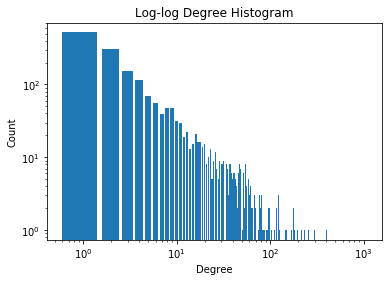

In [81]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt)

plt.title("Log-log Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xscale('log')
plt.yscale('log')
# ax.set_xticks([d + 0.4 for d in deg])
# ax.set_xticklabels(deg)

In [211]:
nx.write_gml(G, 'event_network_5core_nogen.gml')

In [251]:
btw_cent = nx.betweenness_centrality(G)

In [254]:
for item in sorted(btw_cent, key=dict(btw_cent).get, reverse=True)[0:20]:
    print(item, btw_cent[item])

find 0.07771785396330334
have 0.07188336628719605
go 0.07125491136688807
take 0.05642949021099016
tell 0.052719889093232
try 0.03820684861288649
get 0.03483952289840119
leave 0.02931218436880866
see 0.028997103856425843
become 0.028226003423238444
meet 0.026156912279379392
kill 0.024637181704748233
make 0.020064354704979078
begin 0.01961336642261736
decide 0.017080471473251133
give 0.015217292456641971
discover 0.014936373094460326
return 0.014364956292061288
manage 0.01342225284931383
ask 0.013108396661819795


### Backbone extraction

In [217]:
from backbone import disparity_filter, disparity_filter_alpha_cut

In [218]:
G_c = disparity_filter(G)

In [219]:
G_c.number_of_nodes()

2026

In [223]:
C = disparity_filter_alpha_cut(G_c,weight='weight', alpha_t = 0.3)

In [224]:
C.number_of_edges()

7488

In [225]:
C.number_of_nodes()

908

In [226]:
nx.write_gml(C, 'event_network_backbone_nogen.gml')

In [227]:
nx.__version__

'2.2'

### Event transitions

In [170]:
df = pd.DataFrame.from_records(edgelist_wtd, columns = ['src', 'des', 'weight'])

In [171]:
df.head(2)

src      des  weight
0  confronts  manages       8
1       come  arrives       4

Normalize by the method used in the linkedin paper. From that paper:


The expected flux between $i$ and $j$ is estimated by 
%
\begin{equation} 
%
\mathop{\mathbb{E}}(w_{i\rightarrow j}) = S^{\mathrm{out}}_i \frac{S^{\mathrm{in}}_j}{\sum_k S^{\mathrm{in}}_k},
%
\end{equation}
%
where $S^{\mathrm{out}}$ is the total number of members who 
moved out of $i$, and $ S^{\mathrm{in}}_j$ is the total number of members that
moved into $j$. 
Thus the normalized flux from $i$ to $j$ is estimated by
%
\begin{equation} T_{i\rightarrow j} = \frac{w_{i\rightarrow
j}}{\mathop{\mathbb{E}}(w_{i\rightarrow j})}. \end{equation}
%
As a result, we have $T_{i\rightarrow j}>1$ if there are more people moving
from $i$ to $j$ than expected by the given null model, and  $T_{i\rightarrow
j}<1$ vice versa. 


In [172]:
# Compute Size of Each event as source (S_i out)
s_src = df.groupby('src', as_index=False).agg({'weight': np.sum})
s_src.columns = ['src_event', 'size']

In [173]:
s_src.head(2)

src_event  size
0   accepts  1523
1    admits   761

In [174]:
# Compute Size of Each event as destination (S_i in)
s_des = df.groupby('des', as_index=False).agg({'weight': np.sum})
s_des.columns = ['des_event', 'size']

In [175]:
s_des.head(2)

des_event  size
0   accepts  1215
1    admits   846

In [176]:
expected = pd.merge(df, s_src, left_on='src', right_on = 'src_event')

In [177]:
expected.head(2)

src      des  weight  src_event  size
0  confronts  manages       8  confronts  3698
1  confronts    kills      13  confronts  3698

In [178]:
expected = pd.merge(expected, s_des, left_on='des', right_on='des_event', suffixes=['_src', '_des'])

In [179]:
len(expected)

50315

In [180]:
expected['exp'] = expected['size_src']*expected['size_des']/sum(expected['size_des']) # Sum of all in weights
expected['normed_weight'] = expected['weight']/expected['exp'] # Normalized = actual weight/expected weight
expected = expected[['src', 'des', 'normed_weight']]

In [181]:
expected = expected.drop_duplicates()

In [182]:
expected.head(2)

src      des  normed_weight
0  confronts  manages    3837.067581
8       come  manages    4859.409560

In [183]:
len(expected)

6639

In [184]:
df = expected

### Hierarchical clustering

In [185]:
df = df.pivot(index="src", columns="des", values='normed_weight')
df.fillna(1.0, inplace=True)
df = np.log(df)

In [186]:
df.head()

des        accepts     admits    agrees    appears   arrives      asks  \
src                                                                      
accepts  11.040022   0.000000  8.162628   0.000000  0.000000  6.574117   
admits    0.000000  11.536190  8.856432   0.000000  0.000000  7.778746   
agrees    0.000000   7.951941  8.124815   8.140809  7.265231  5.917264   
appears   0.000000   0.000000  7.639599  11.319154  7.399055  7.149700   
arrives   0.000000   7.780885  6.081956   0.000000  7.738532  5.959782   

des      attempts    become   becomes    begins    ...     thinks    throws  \
src                                                ...                        
accepts  0.000000  0.000000  7.317795  7.827995    ...        0.0  0.000000   
admits   8.789646  0.000000  7.675127  0.000000    ...        0.0  0.000000   
agrees   7.507983  6.351527  5.477172  6.477995    ...        0.0  7.421452   
appears  7.978278  0.000000  6.640615  7.528109    ...        0.0  0.000000   
arrives  7.519248  5.957327  4.900651  5.901474    ...        0.0  7.943543   

des          told     tries       try     turns      uses  wakes     walks  \
src                                                                          
accepts  8.842248  6.640060  0.000000  0.000000  8.093419    0.0  0.000000   
admits   0.000000  7.557008  0.000000  9.824801  0.000000    0.0  0.000000   
agrees   7.743563  6.582829  7.246459  0.000000  7.687881    0.0  6.963605   
appears  0.000000  7.082112  0.000000  8.725751  9.074467    0.0  8.350191   
arrives  7.860189  5.945682  7.363085  6.762643  6.705894    0.0  7.080230   

des         wants  
src                
accepts  7.847836  
admits   8.541640  
agrees   6.566829  
appears  0.000000  
arrives  0.000000  

[5 rows x 100 columns]

In [187]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import seaborn as sns


In [188]:

method = 'average'
metric = 'euclidean'
Z = hierarchy.linkage(df, method=method, metric=metric)
# c, coph_dists = hierarchy.cophenet(Z, pdist(df))
# part = hierarchy.fclusterdata(Z,1.5)

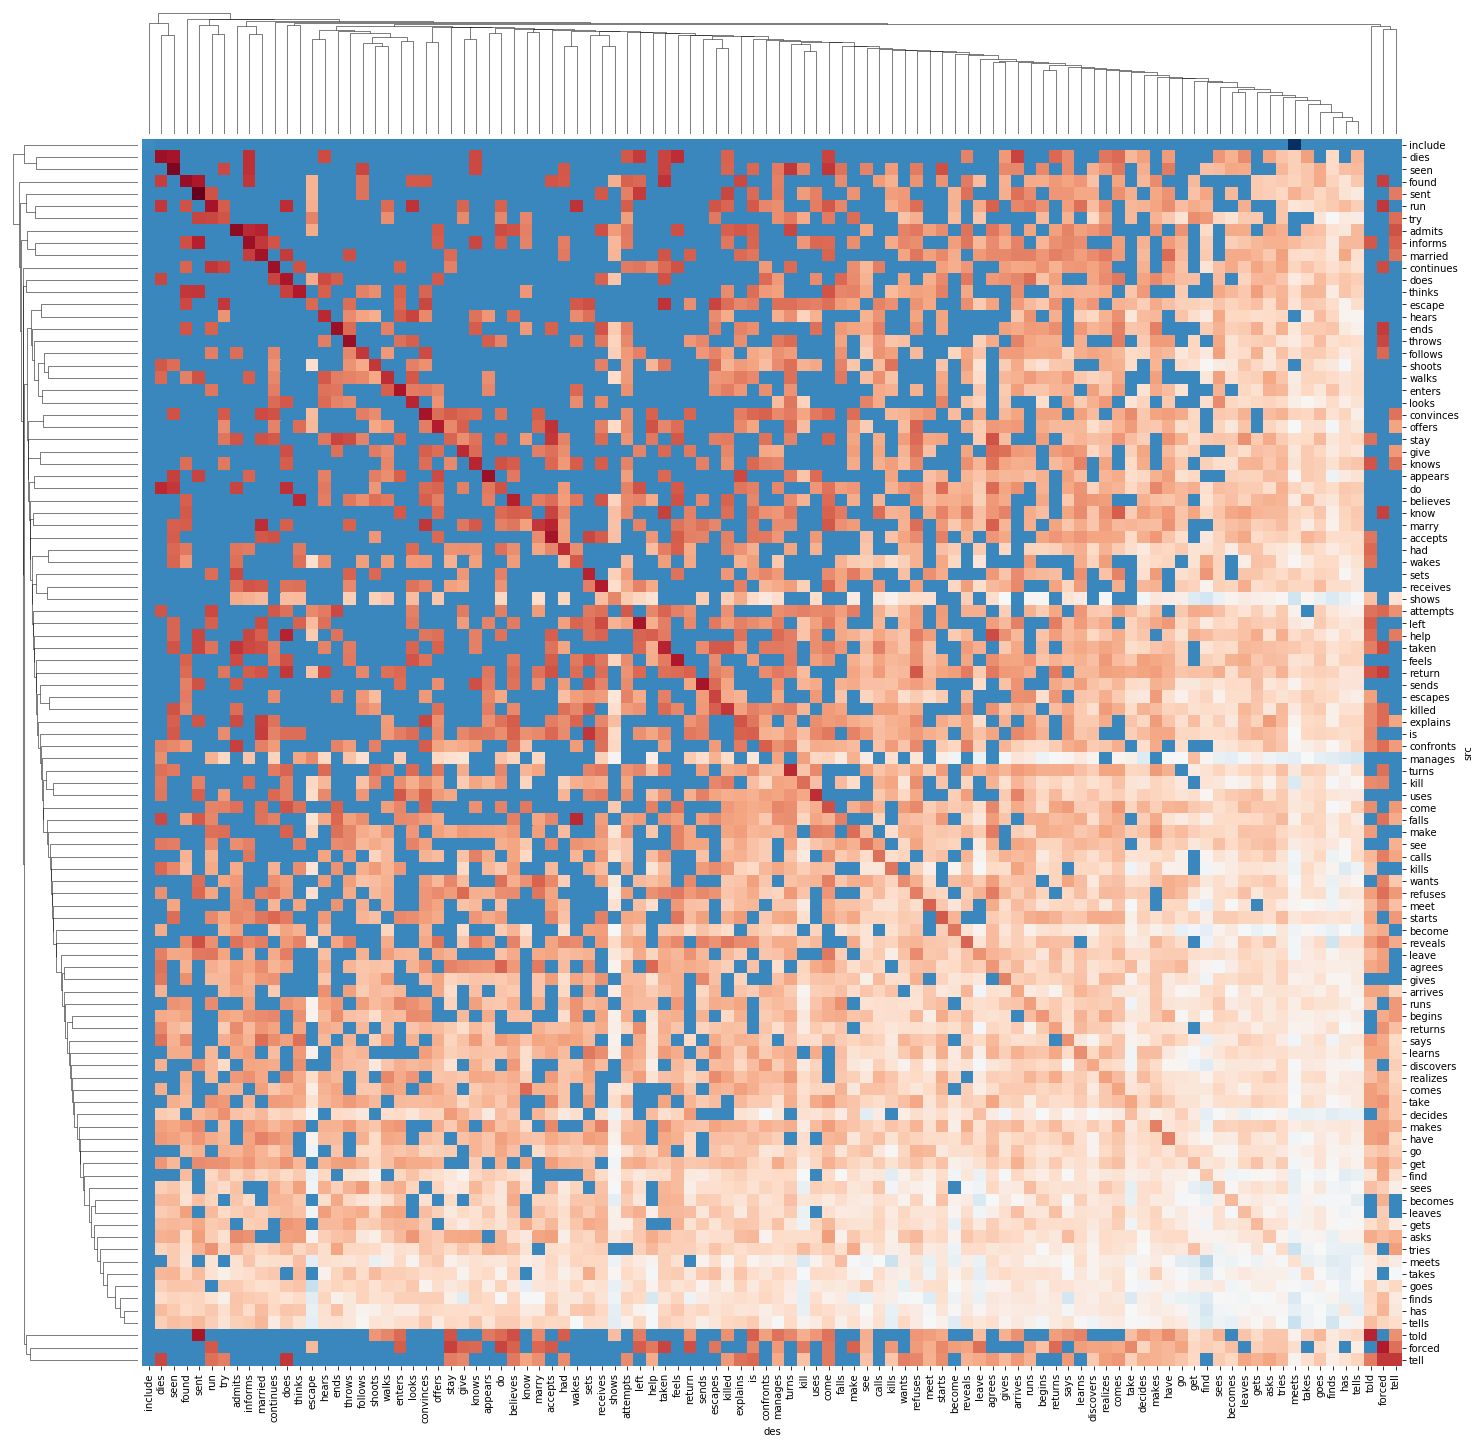

In [190]:
cm = sns.clustermap(df,figsize=(25, 25),row_linkage=Z, col_linkage=Z, cmap = "RdBu_r")#, xticklabels = False, yticklabels = False)
cm.cax.set_visible(False)

plt.savefig('cluster_top_events_nogen.pdf', format='pdf')